In [1]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import pandas as pd
import os


In [2]:
def load_audio_files(audio_dir):
    audio_data = []
    for file in os.listdir(audio_dir):
        if file.endswith('.wav') or file.endswith('.mp3'):
            path = os.path.join(audio_dir, file)
            y, sr = librosa.load(path, sr=None)
            audio_data.append({'filename': file, 'data': y, 'sr': sr})
    return audio_data


In [3]:
def visualize_audio(audio):
    y, sr = audio['data'], audio['sr']
    filename = audio['filename'].split('.')[0]

    # Waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform: {filename}')
    plt.show()

    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram: {filename}')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


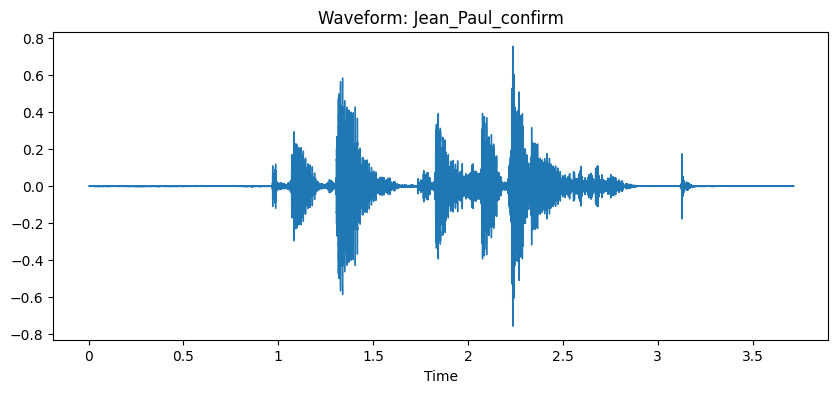

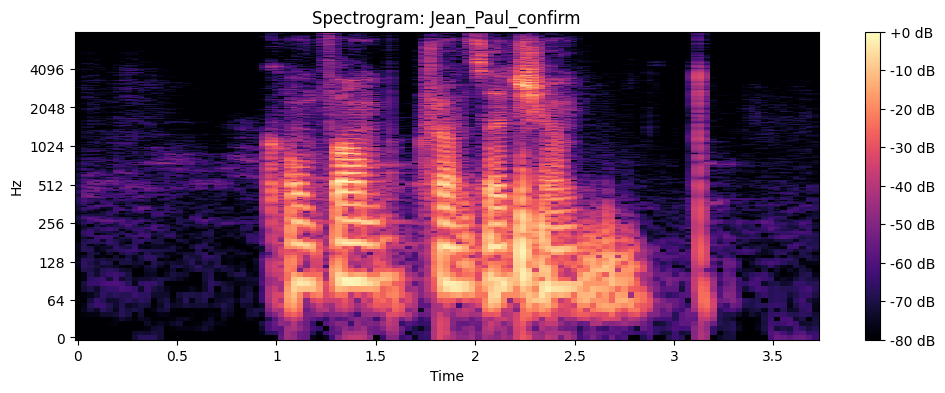

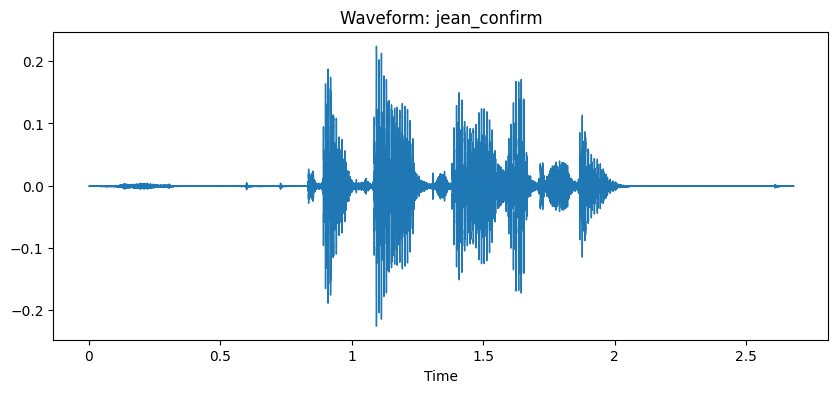

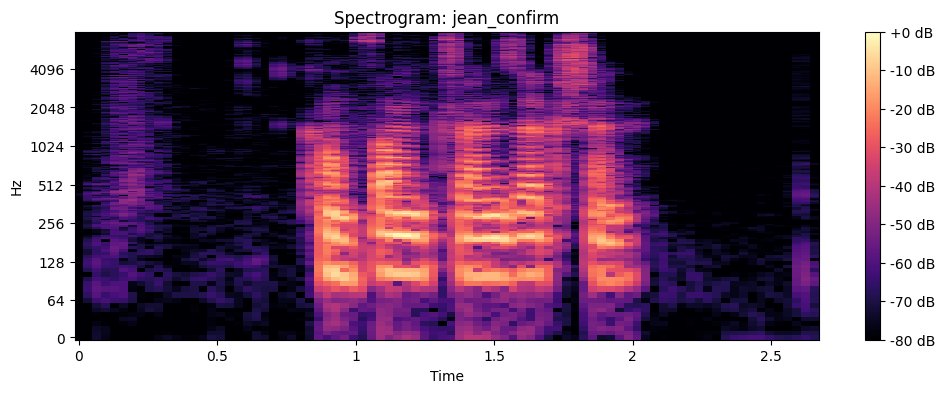

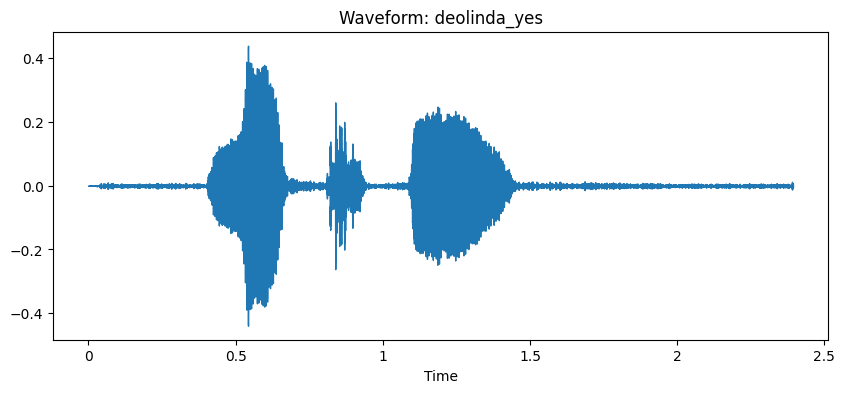

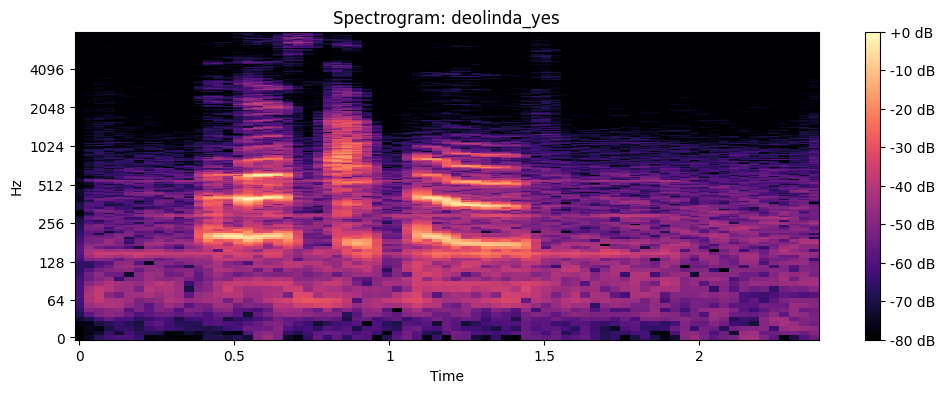

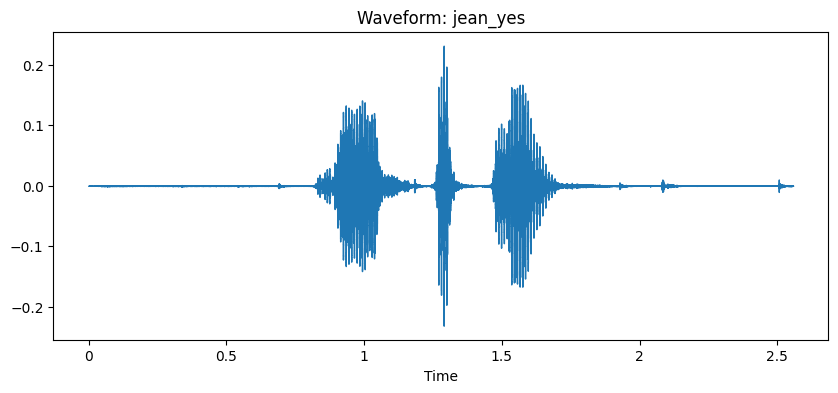

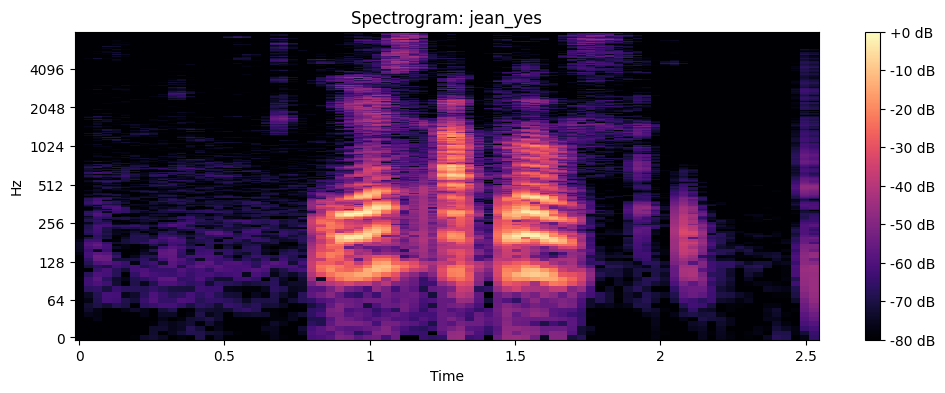

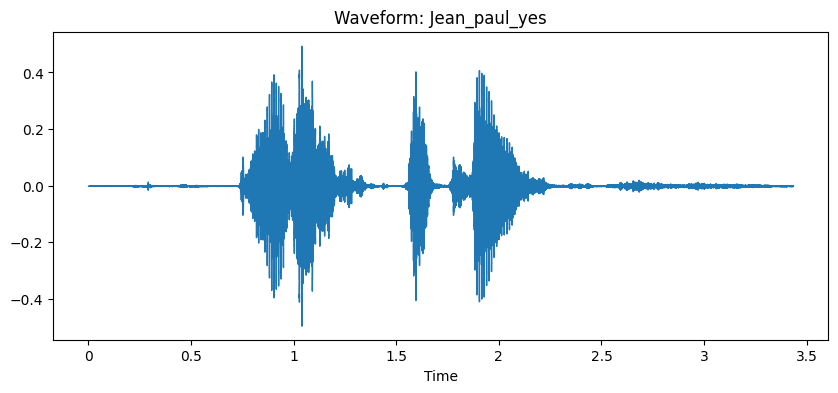

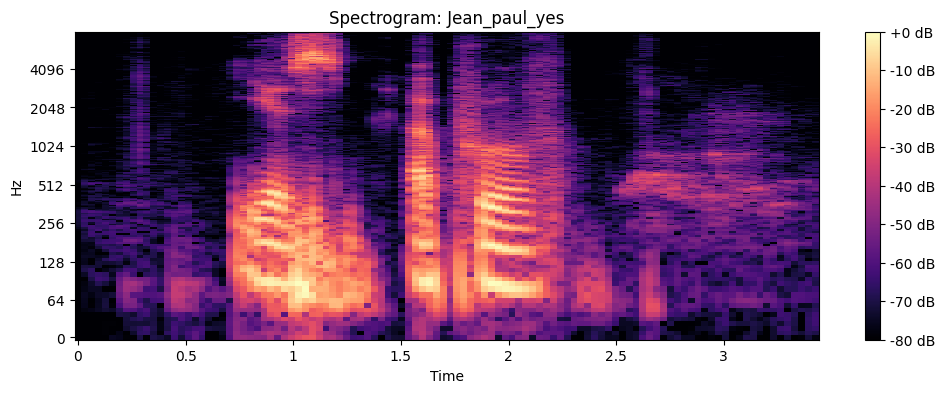

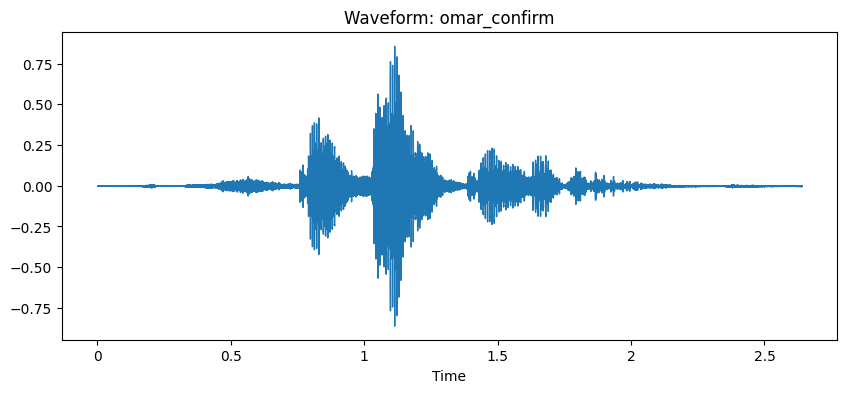

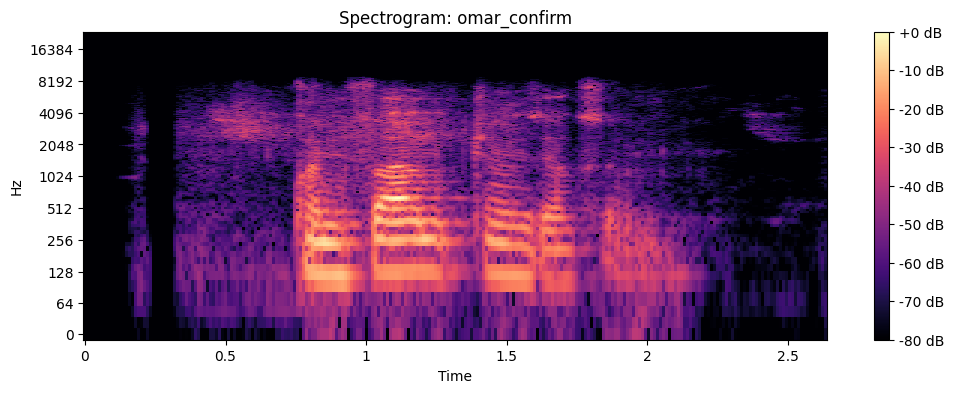

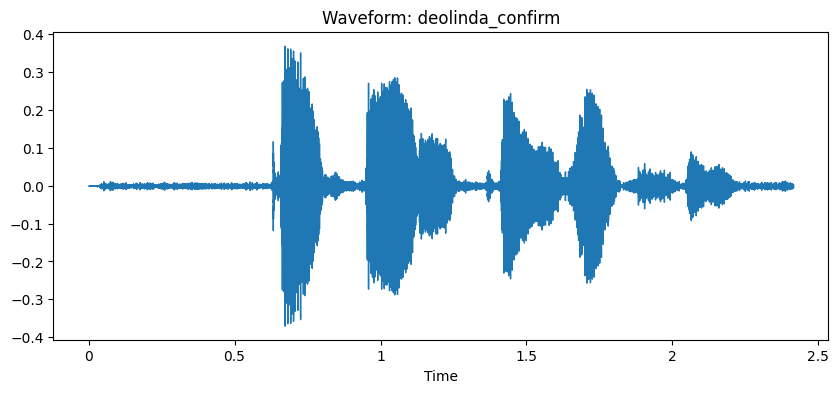

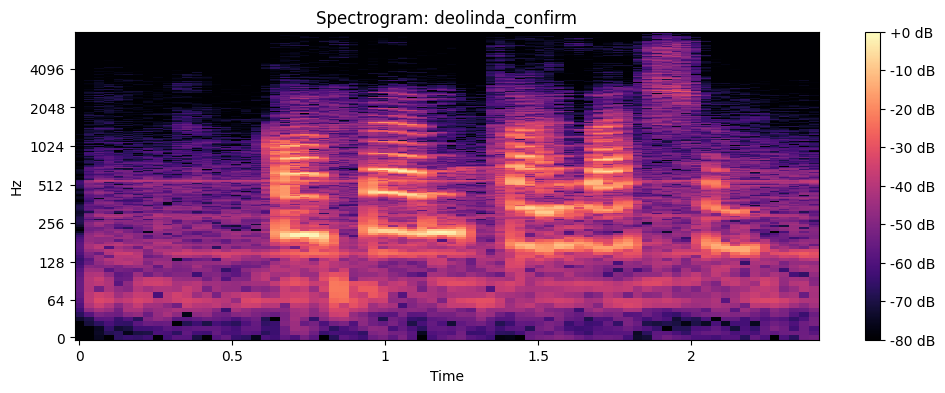

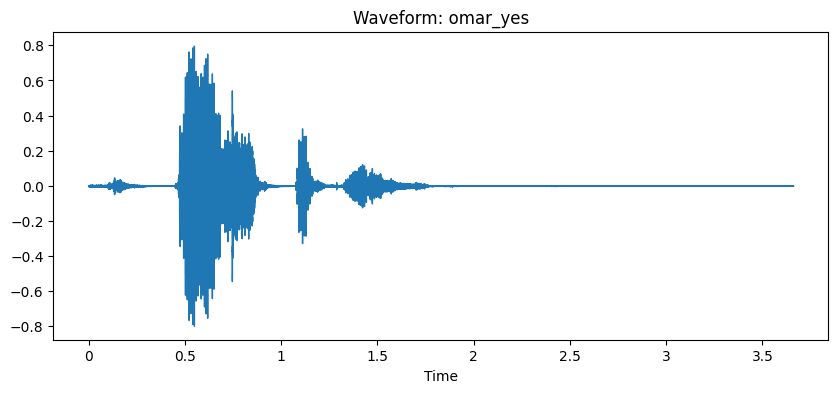

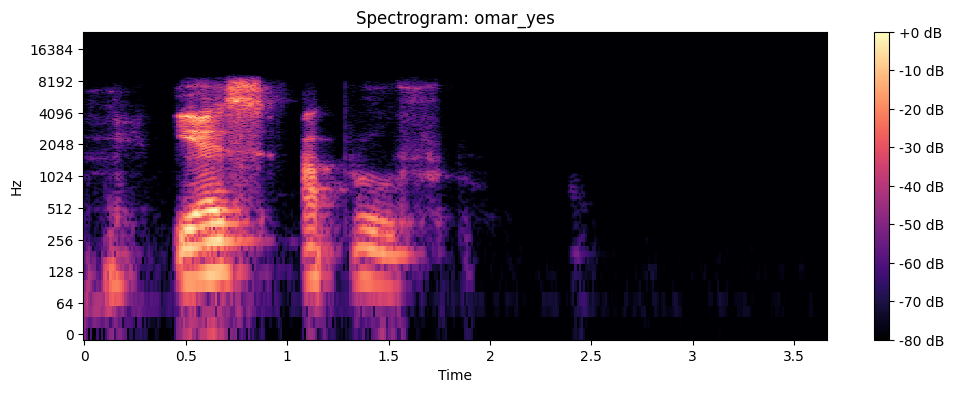

In [4]:
audios = load_audio_files('audio')

for audio in audios:
  visualize_audio(audio)


# Interpretation

## Waveform

A waveform shows how the **amplitude (loudness)** of an audio signal changes over time.

- **X-axis**: Time (in seconds)  
- **Y-axis**: Amplitude  
- Used to identify when speech happens and how intense it is.

---

## Spectrogram

A spectrogram shows the **frequency content** of an audio signal over time.

- **X-axis**: Time  
- **Y-axis**: Frequency (Hz)  
- **Color intensity**: Amplitude (yellow = louder; dark = quieter)  
- Helps in visualizing speech formants (vowel patterns), consonants, and noise.



### 🔊 Omar

**Phrase 1: "yes approved"**  
- The waveform shows a moderate amplitude peak at around 0.3s, suggesting emphasis on "yes".
- The spectrogram displays prominent vowel formants at approximately 500 Hz and 1500 Hz, which is typical of clear vowel pronunciation.

🗣️ Observation: Omar’s speech is clear, with good energy and articulation across both phrases.

---

**Phrase 2: "confirm transaction"**  
- The waveform shows two main amplitude peaks, corresponding to "confirm" and "transaction", indicating both words are spoken with clear emphasis.
- The spectrogram reveals strong vowel formants near 500 Hz and 1500 Hz for each word, typical of clear vowel articulation.

🗣️ Observation: Omar articulates both words distinctly, with consistent energy and clear separation between the two parts of the phrase.

---

### 🔊 Jean Paul

**Phrase 1: "yes approved"**  
- The waveform displays two primary peaks, the first around 1s ("yes") and the second near 1.5s ("approved"), indicating clear emphasis on both parts of the phrase.
- The spectrogram shows distinct vowel formant bands at around 500 Hz and 1500 Hz for each word.

🗣️ Observation: Jean Paul’s speech demonstrates clear separation and articulation of both words, with well-defined energy in each segment.

---

**Phrase 2: "confirm transaction"**  
- The waveform reveals two main high-amplitude peaks, one for "confirm" and another for "transaction".
- The spectrogram displays strong, separate formants for each word, with prominent energy bands at the expected vowel frequencies.

🗣️ Observation: Jean Paul’s pronunciation is clear and energetic, with good articulation and separation between both words.

---

### 🔊 Deolinda

**Phrase 1: "yes approved"**  
- The waveform shows two clear amplitude peaks, one for each word, demonstrating distinct emphasis.
- The spectrogram highlights vowel formants at around 500 Hz and 1500 Hz for both "yes" and "approved".

🗣️ Observation: Deolinda speaks both words with clarity and good energy, ensuring each is well-articulated.

---

**Phrase 2: "confirm transaction"**  
- The waveform displays two prominent peaks, corresponding to "confirm" and "transaction", each with moderate emphasis.
- The spectrogram reveals strong vowel formants, especially for each syllable, consistent with clear, articulated speech.

🗣️ Observation: Deolinda’s speech is distinct and energetic, with clear separation and emphasis on each word.

---

### 🔊 Jean

**Phrase 1: "yes approved"**  
- The waveform features two main peaks, one for each word, showing clear emphasis and separation.
- The spectrogram shows prominent vowel formants at approximately 500 Hz and 1500 Hz for both "yes" and "approved".

🗣️ Observation: Jean’s speech is clear, with good energy and distinct articulation across both words.

---

**Phrase 2: "confirm transaction"**  
- The waveform displays two high-amplitude peaks, corresponding to "confirm" and "transaction".
- The spectrogram highlights strong vowel formants for each word, consistent with clear articulation.

🗣️ Observation: Jean pronounces both words distinctly and with clear energy, as seen in the separated peaks and formant patterns.

---




In [5]:
def augment_audio(y, sr):
    augmented = {}
    augmented['pitch'] = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    augmented['stretch'] = librosa.effects.time_stretch(y, rate=1.2)
    noise = np.random.normal(0, 0.005, y.shape)
    augmented['noise'] = y + noise
    return augmented

In [6]:
augmented_audios = [augment_audio(audio['data'], audio['sr']) for audio in audios]
for aug_dict in augmented_audios:
    for aug_type, aug_array in aug_dict.items():
        print(f"Augmentation: {aug_type}")
        display(Audio(aug_array, rate=audio['sr']))


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


Augmentation: pitch


Augmentation: stretch


Augmentation: noise


In [7]:
print("Original Audio")
Audio('audio/omar_yes.wav')

Original Audio


In [8]:
def extract_features(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    energy = np.mean(y**2)
    features = {'mfccs': mfccs_mean.tolist(), 'rolloff': rolloff, 'energy': energy}
    return features

In [9]:
for audio in audios:
    print(audio['filename'], audio['data'].shape, audio['sr'])

Jean_Paul_confirm.wav (59416,) 16000
jean_confirm.wav (42845,) 16000
deolinda_yes.wav (38296,) 16000
jean_yes.wav (40925,) 16000
Jean_paul_yes.wav (54936,) 16000
omar_confirm.wav (126720,) 48000
deolinda_confirm.wav (38616,) 16000
omar_yes.wav (175680,) 48000


In [10]:
features_list = []

for audio in audios:
    features = extract_features(audio['data'], audio['sr'])
    features['filename'] = audio['filename']
    features_list.append(features)


df = pd.DataFrame(features_list)
print(df)

                                               mfccs      rolloff    energy  \
0  [-416.39520263671875, 94.86292266845703, 16.77...  2797.542735  0.003116   
1  [-510.0621643066406, 71.02044677734375, 9.9768...  4306.175595  0.000418   
2  [-432.65081787109375, 140.2063446044922, 48.46...  1328.229167  0.003161   
3  [-563.9675903320312, 72.18192291259766, 20.598...  4216.210938  0.000402   
4  [-435.0960693359375, 95.6465835571289, 27.0035...  2657.696759  0.002628   
5  [-398.777099609375, 101.90130615234375, -24.89...  5297.253024  0.003522   
6  [-374.305419921875, 158.9746856689453, 3.31858...  1559.107730  0.002726   
7  [-514.2896728515625, 60.855674743652344, -7.31...  7274.618459  0.002808   

                filename  
0  Jean_Paul_confirm.wav  
1       jean_confirm.wav  
2       deolinda_yes.wav  
3           jean_yes.wav  
4      Jean_paul_yes.wav  
5       omar_confirm.wav  
6   deolinda_confirm.wav  
7           omar_yes.wav  


In [11]:
df.to_csv('audio_features.csv', index=False)